In [1]:
import sys

sys.path.append('/home/alta/Conversational/OET/al826/2022/seq_cls')

In [2]:
from types import SimpleNamespace

from src.eval_handler import EvalHandler
from src.config import config

#from src.utils import download_hpc_model
#download_hpc_model('arch/led_simple_2')

In [3]:
eval_path = f"{config.base_dir}/data/swda/standard/test.json"
label_path = f"{config.base_dir}/data/swda/standard/labels.json"

test_args = {'test_path':eval_path,
             'label_path':label_path, 
             'bsz':4}

test_args = SimpleNamespace(**test_args)

In [ ]:
pre_tr_accs = []
for i in range(1,6):
    model_name = f'arch/led_simple_{i}'
    E = EvalHandler(model_name, hpc=True)
    _, acc= E.evaluate(test_args)
    pre_tr_accs.append(acc)

model_name = f'arch/led_full'
E = EvalHandler(model_name, hpc=True)
_, acc= E.evaluate(test_args)
forced_accs.append(acc)


In [5]:
rand_accs = []
for i in range(5,7):
    model_name = f'arch/led_simple_rand_{i}'
    E = EvalHandler(model_name, hpc=True)
    _, acc= E.evaluate(test_args)
    rand_accs.append(acc)

using the following transformer mode: led_simple_rand_5
using baseline seq2seq set up
loss 1.658   acc 0.601
using the following transformer mode: led_simple_rand_6
using baseline seq2seq set up
loss 1.564   acc 0.615


In [6]:
pre_tr_accs = [0.365, 0.455, 0.563, 0.591, 0.636, 0.632]
rand_accs = [0.353, 0.508, 0.545, 0.614, 0.601, 0.615]

/home/miproj/4thyr.oct2019/al826/anaconda3/envs/torch1.7/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/miproj/4thyr.oct2019/al826/anaconda3/envs/torch1.7/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1.0, 6.0)

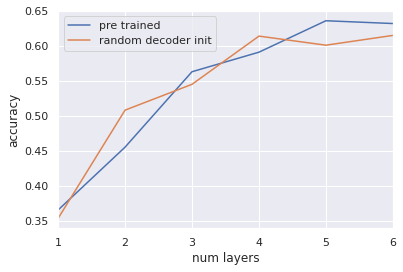

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
x = range(1,7)
sns.lineplot(x, pre_tr_accs)
sns.lineplot(x, rand_accs)

plt.xlabel('num layers')
plt.ylabel('accuracy')

plt.legend(['pre trained', 'random decoder init'])
plt.xlim(1,6)